## 1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [56]:
text_data = pd.read_csv("Elon_musk.csv",encoding = "ISO-8859-1")

In [57]:
text_data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [58]:
text_data.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [59]:
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


## Data Cleaning

### Removing irrelevant information (e.g., URLs, special characters).

In [60]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [61]:
text_data['Text'] = text_data.Text.apply(clean)
text_data.Text

0                                            im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: Text, Length: 1999, dtype: object

### Lowercasing: Converting all text to lowercase for consistency.

In [62]:
# Apply lowercasing to the 'Text' column
text_data['Text'] = text_data['Text'].apply(lambda x: x.lower())

# Print the DataFrame
print(text_data)

      Unnamed: 0                                               Text
0              1                                       im an alien
1              2  idaacarmack ray tracing on cyberpunk with hdr ...
2              3                   joerogan spotify great interview
3              4                             doge is underestimated
4              5  teslacn congratulations tesla china for amazin...
...          ...                                                ...
1994        1995  flcnhvy true it sounds so surreal but the nega...
1995        1996  ppathole make sure to read ur terms amp condit...
1996        1997                  teslagong ppathole samwise gamgee
1997        1998                 ppathole altho dumb and dumber is 
1998        1999                            progress update august 

[1999 rows x 2 columns]


In [63]:
#Word frequency
freq = pd.Series(' '.join(text_data['Text']).split()).value_counts()[:20] # for top 20
freq

the               486
to                400
a                 355
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                137
we                135
on                129
that              127
rt                127
but               126
dtype: int64

### Removing stop words: Common words like "and," "the," "is" are often removed using custom stop words list and also inbuilt stop word list

In [64]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords') # Download the stopwords dataset

# Load custom stop words from an external file
custom_stop_words_file = 'stop.txt'
with open(custom_stop_words_file, 'r') as file:
    custom_stop_words = [line.strip() for line in file]

# Get the list of NLTK's inbuilt English stop words
inbuilt_stop_words = set(stopwords.words('english'))

# Combine custom and inbuilt stop words into a single set
stop_words = set(custom_stop_words).union(inbuilt_stop_words)

# Define a function to remove stop words
def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stop_words function to the 'Text' column
text_data['Text'] = text_data['Text'].apply(remove_stop_words)

# Print the DataFrame
print(text_data)

      Unnamed: 0                                               Text
0              1                                          im alien
1              2    idaacarmack ray tracing cyberpunk hdr nextlevel
2              3                   joerogan spotify great interview
3              4                                doge underestimated
4              5  teslacn congratulations tesla china amazing ex...
...          ...                                                ...
1994        1995  flcnhvy true sounds surreal negative propagand...
1995        1996  ppathole make read ur terms amp conditions cli...
1996        1997                  teslagong ppathole samwise gamgee
1997        1998                         ppathole altho dumb dumber
1998        1999                             progress update august

[1999 rows x 2 columns]


[nltk_data] Downloading package stopwords to C:\Users\Vinith
[nltk_data]     MH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
#Word frequency
freq = pd.Series(' '.join(text_data['Text']).split()).value_counts()[:20] # for top 20
freq

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
its                56
nasaspaceflight     55
haha                55
good                51
launch              49
yeah                41
cleantechnica       40
kristennetten       35
true                35
dtype: int64

### Lemmatization: Reducing words to their base form.

In [66]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer

# Download the WordNet dataset (if not already downloaded)
nltk.download('wordnet')

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a sentence
def lemmatize_sentence(sentence):
    words = nltk.word_tokenize(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Apply the lemmatization function to the 'text' column
text_data['Text'] = text_data['Text'].apply(lemmatize_sentence)

# Print the DataFrame with the lemmatized text
print(text_data)

[nltk_data] Downloading package wordnet to C:\Users\Vinith
[nltk_data]     MH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


      Unnamed: 0                                               Text
0              1                                          im alien
1              2    idaacarmack ray tracing cyberpunk hdr nextlevel
2              3                   joerogan spotify great interview
3              4                                doge underestimated
4              5  teslacn congratulation tesla china amazing exe...
...          ...                                                ...
1994        1995  flcnhvy true sound surreal negative propaganda...
1995        1996  ppathole make read ur term amp condition click...
1996        1997                  teslagong ppathole samwise gamgee
1997        1998                         ppathole altho dumb dumber
1998        1999                             progress update august

[1999 rows x 2 columns]


### Sentiment Labeling: Assigning labels to the data to indicate sentiment polarity, such as positive, negative, or neutral.  

In [67]:
# Initialize empty lists for positive and negative words
positive_words = []
negative_words = []

# Read positive words from the text file into the positive_words list
with open('positive-words.txt', 'r') as file:
    for line in file:
        positive_words.append(line.strip())  # Remove newline characters and add to the list

# Read negative words from the text file into the negative_words list
with open('negative-words.txt', 'r') as file:
    for line in file:
        negative_words.append(line.strip())  # Remove newline characters and add to the list

# Function to classify sentiment
def classify_sentiment(text):
    words = text.split()  # Split the text into words
    num_positive = sum(1 for word in words if word.lower() in positive_words)
    num_negative = sum(1 for word in words if word.lower() in negative_words)
    
    if num_positive > num_negative:
        return 'positive'
    elif num_negative > num_positive:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment classification function to the DataFrame
text_data['sentiment'] = text_data['Text'].apply(classify_sentiment)

# Print the DataFrame with sentiment labels
print(text_data)

      Unnamed: 0                                               Text sentiment
0              1                                          im alien   neutral
1              2    idaacarmack ray tracing cyberpunk hdr nextlevel   neutral
2              3                   joerogan spotify great interview  positive
3              4                                doge underestimated   neutral
4              5  teslacn congratulation tesla china amazing exe...  positive
...          ...                                                ...       ...
1994        1995  flcnhvy true sound surreal negative propaganda...   neutral
1995        1996  ppathole make read ur term amp condition click...   neutral
1996        1997                  teslagong ppathole samwise gamgee   neutral
1997        1998                         ppathole altho dumb dumber  negative
1998        1999                             progress update august  positive

[1999 rows x 3 columns]


In [68]:
text_data.head(5)

,Unnamed: 0,Text,sentiment
0,1,im alien,neutral
1,2,idaacarmack ray tracing cyberpunk hdr nextlevel,neutral
2,3,joerogan spotify great interview,positive
3,4,doge underestimated,neutral
4,5,teslacn congratulation tesla china amazing exe...,positive


### N grams using Count Vectorizer. 

In [69]:
# Import CountVectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# Create a list of values from the Name column
texts_list = text_data['Text'].tolist()
print(texts_list)

# Create a CountVectorizer object
cv = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 1000)

# Fit the object with the texts
cv.fit(texts_list)

# Get the feature names
cv.get_feature_names_out()

['i\x92m alien', 'idaacarmack ray tracing cyberpunk hdr nextlevel', 'joerogan spotify great interview', 'doge underestimated', 'teslacn congratulation tesla china amazing execution year', 'happy year ox', 'frodo underdoge thought fail httpstcozgxjfdzzrm', 'owensparks flcnhvy haha', 'flcnhvy tweet represent realworld time allocation', 'entertaining outcome', 'givedirectly', 'agree clubhouse kanyewest', '', 'geoffkeighley unrealengine it\x92s real', 'bought dogecoin lil toddler hodler', 'joshmanmode issue sentencing bit high', 'freewalletorg fixing', 'freewalletorg unlock account', 'astrojordy', 'true power haha', 'freewalletorg crypto wallet won\x92t give private key avoided cost', 'freewalletorg app suck', 'rt spacex nasa selected falcon heavy launch element lunar gateway mission', 'ajtourville', 'rationaletienne adamklotz predict cash flow starlink ipo', 'rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor', 'rationaletienne adamklotz spacex pas d

array(['absolutely', 'access', 'accurate', 'adamklotz', 'add', 'ago',
       'agree', 'agreed', 'ahead', 'ai', 'aiming', 'air', 'ajtourville',
       'ajtourville commaai', 'ajtourville commaai tesmaniancom',
       'ajtourville spacex', 'alexavoigt', 'alexavoigt mikezimon',
       'alexavoigt mikezimon wholemarsblog', 'alien', 'amazing', 'amount',
       'amp', 'amp tesla', 'analysis', 'appreciated', 'approval',
       'archillect', 'architecture', 'arm', 'arstechnica', 'article',
       'astrobehnken', 'astrobehnken astrodoug', 'astrodoug',
       'astrojordy', 'astrojordy erujabidi', 'astrojordy flcnhvy',
       'astronaut', 'astronomiaum', 'attack', 'august', 'austin',
       'austinteslaclub', 'austinteslaclub joetegtmeyer',
       'austinteslaclub joetegtmeyer txterafactory', 'australia',
       'automatically', 'autopilot', 'autopilotai', 'average', 'awesome',
       'back', 'back work', 'background', 'bad', 'bar', 'base', 'battery',
       'bay', 'bbcsciencenews', 'benmezrich',

### N grams using TFIDF Vectorizer.

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize and fit the TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,3),max_features = 1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(texts_list)

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()
print(feature_names)

['absolutely' 'access' 'accurate' 'adamklotz' 'add' 'ago' 'agree' 'agreed'
 'ahead' 'ai' 'aiming' 'air' 'ajtourville' 'ajtourville commaai'
 'ajtourville commaai tesmaniancom' 'ajtourville spacex' 'alexavoigt'
 'alexavoigt mikezimon' 'alexavoigt mikezimon wholemarsblog' 'alien'
 'amazing' 'amount' 'amp' 'amp tesla' 'analysis' 'appreciated' 'approval'
 'archillect' 'architecture' 'arm' 'arstechnica' 'article' 'astrobehnken'
 'astrobehnken astrodoug' 'astrodoug' 'astrojordy' 'astrojordy erujabidi'
 'astrojordy flcnhvy' 'astronaut' 'astronomiaum' 'attack' 'august'
 'austin' 'austinteslaclub' 'austinteslaclub joetegtmeyer'
 'austinteslaclub joetegtmeyer txterafactory' 'australia' 'automatically'
 'autopilot' 'autopilotai' 'average' 'awesome' 'back' 'back work'
 'background' 'bad' 'bar' 'base' 'battery' 'bay' 'bbcsciencenews'
 'benmezrich' 'berlin' 'berniesanders' 'beta' 'big' 'bigger' 'biggest'
 'bit' 'bitcoin' 'board' 'boca' 'boca chica' 'bocachicagal'
 'bocachicagal nasaspaceflight' 'boc

# Word Cloud 

In [71]:
text_string = " ".join(texts_list)
print(texts_list)

['i\x92m alien', 'idaacarmack ray tracing cyberpunk hdr nextlevel', 'joerogan spotify great interview', 'doge underestimated', 'teslacn congratulation tesla china amazing execution year', 'happy year ox', 'frodo underdoge thought fail httpstcozgxjfdzzrm', 'owensparks flcnhvy haha', 'flcnhvy tweet represent realworld time allocation', 'entertaining outcome', 'givedirectly', 'agree clubhouse kanyewest', '', 'geoffkeighley unrealengine it\x92s real', 'bought dogecoin lil toddler hodler', 'joshmanmode issue sentencing bit high', 'freewalletorg fixing', 'freewalletorg unlock account', 'astrojordy', 'true power haha', 'freewalletorg crypto wallet won\x92t give private key avoided cost', 'freewalletorg app suck', 'rt spacex nasa selected falcon heavy launch element lunar gateway mission', 'ajtourville', 'rationaletienne adamklotz predict cash flow starlink ipo', 'rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor', 'rationaletienne adamklotz spacex pas d

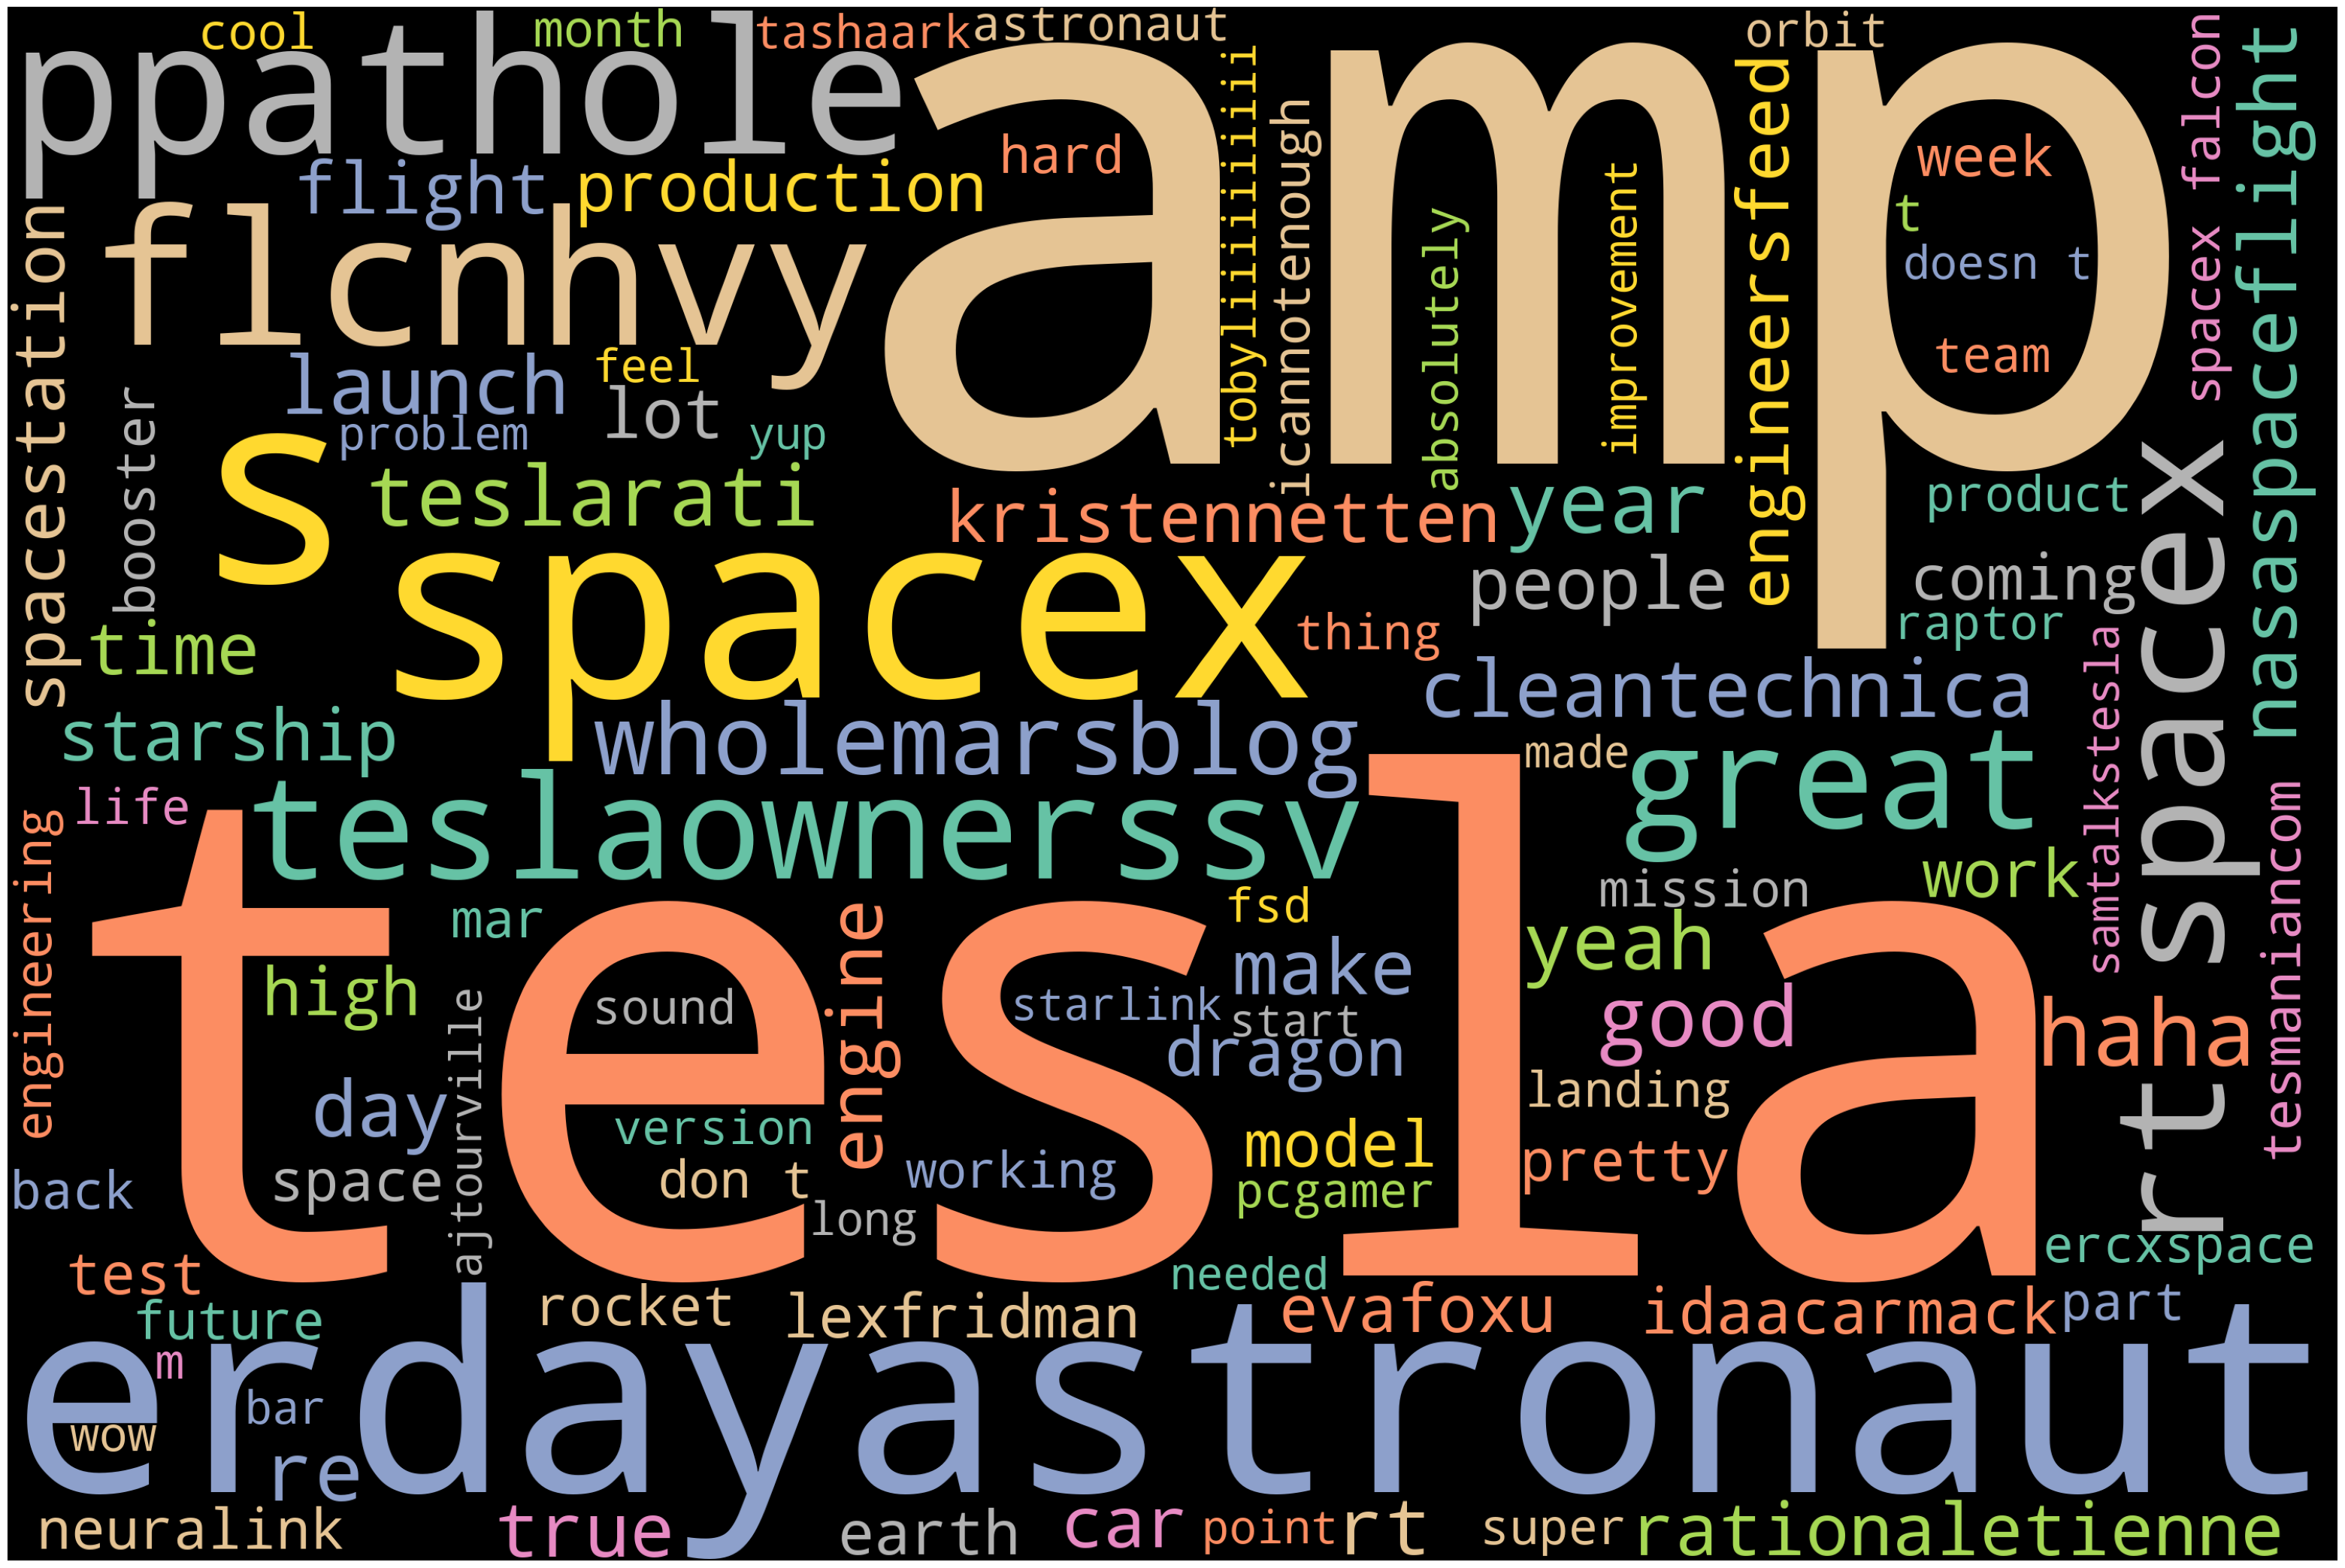

In [72]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text_string)
# Plot
plot_cloud(wordcloud)

In [73]:
# Save image
wordcloud.to_file("elon_musk_tweets.png")

### Feature Extraction: Term Frequency-Inverse Document Frequency (TF-IDF): Assigning weights to words based on their importance in a document relative to the entire dataset.

In [74]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the sentiment labels
text_data['sentiment_encoded'] = encoder.fit_transform(text_data['sentiment'])

In [75]:
text_data.head(5)

,Unnamed: 0,Text,sentiment,sentiment_encoded
0,1,im alien,neutral,1
1,2,idaacarmack ray tracing cyberpunk hdr nextlevel,neutral,1
2,3,joerogan spotify great interview,positive,2
3,4,doge underestimated,neutral,1
4,5,teslacn congratulation tesla china amazing exe...,positive,2


### Count of each sentiment.

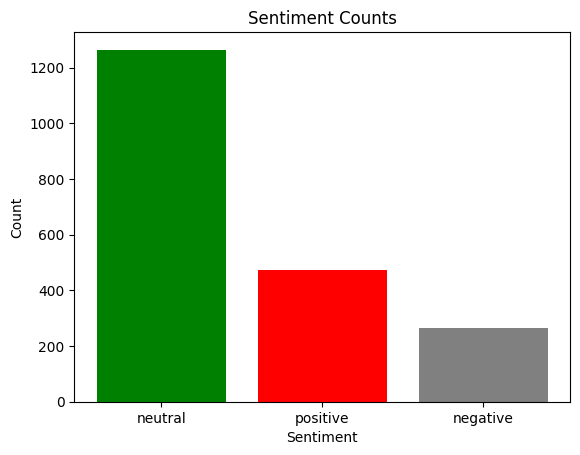

In [76]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the occurrences of each sentiment
sentiment_counts = Counter(text_data.sentiment)

# Extract sentiment labels and counts
labels = list(sentiment_counts.keys())
counts = list(sentiment_counts.values())

# Create a bar chart
plt.bar(labels, counts, color=['green', 'red', 'gray'])

# Add labels and title
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Counts")

# Show the bar chart
plt.show()

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the max_features as needed
X = tfidf_vectorizer.fit_transform(text_data['Text'])
y = text_data['sentiment_encoded']

# Model building using various classification models.  

In [78]:
# Importing train - test split , K-fold Cross validation and accuracy score and classification report 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(columns=["Model", "Accuracy"])

In [79]:
from sklearn.linear_model import LogisticRegression

# Train and evaluate the first model (Logistic Regression)
model_name = "Logistic Regression"

# Train a logistic regression classifier
log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)

# Predict sentiment on the test data
y_pred = log_classifier.predict(X_test)

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy1:.2f}")

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df = result_df.append({"Model": model_name, "Accuracy": accuracy1}, ignore_index=True)

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        57
           1       0.72      0.98      0.83       254
           2       0.85      0.49      0.62        89

    accuracy                           0.74       400
   macro avg       0.86      0.51      0.53       400
weighted avg       0.79      0.74      0.68       400



In [80]:
from sklearn.tree import DecisionTreeClassifier

# Train and evaluate the first model (Logistic Regression)
model_name = "Decision Tree Classifier"

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy2)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df = result_df.append({"Model": model_name, "Accuracy": accuracy2}, ignore_index=True)

Accuracy: 0.7675
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.37      0.47        57
           1       0.80      0.88      0.84       254
           2       0.70      0.70      0.70        89

    accuracy                           0.77       400
   macro avg       0.71      0.65      0.67       400
weighted avg       0.76      0.77      0.76       400



In [81]:
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate the first model (Logistic Regression)
model_name = "Random Forest Classifier"

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy3 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy3)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df = result_df.append({"Model": model_name, "Accuracy": accuracy3}, ignore_index=True)

Accuracy: 0.7825
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.26      0.38        57
           1       0.78      0.94      0.85       254
           2       0.83      0.67      0.75        89

    accuracy                           0.78       400
   macro avg       0.77      0.62      0.66       400
weighted avg       0.78      0.78      0.76       400



In [83]:
from sklearn.svm import SVC

# Train and evaluate the first model (Logistic Regression)
model_name = "SVC"

# Initialize an SVM classifier (SVC)
classifier = SVC(kernel='sigmoid', C=1)

# Train the SVM classifier
classifier.fit(X_train, y_train)

# Predict sentiment on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy4 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy4)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df = result_df.append({"Model": model_name, "Accuracy": accuracy4}, ignore_index=True)

Accuracy: 0.765
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.18      0.29        57
           1       0.74      0.97      0.84       254
           2       0.89      0.55      0.68        89

    accuracy                           0.77       400
   macro avg       0.80      0.57      0.60       400
weighted avg       0.78      0.77      0.73       400



In [84]:
from sklearn.neighbors import KNeighborsClassifier

# Train and evaluate the first model (Logistic Regression)
model_name = "K-Neighbors Classifier"

# Initialize the KNN Classifier with k=3 (you can adjust the value of k as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=4)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy5 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy5)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df = result_df.append({"Model": model_name, "Accuracy": accuracy5}, ignore_index=True)

Accuracy: 0.6575
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.02      0.03        57
           1       0.65      0.99      0.79       254
           2       0.92      0.12      0.22        89

    accuracy                           0.66       400
   macro avg       0.63      0.38      0.35       400
weighted avg       0.67      0.66      0.55       400



In [85]:
from sklearn.naive_bayes import MultinomialNB

# Train and evaluate the first model (Logistic Regression)
model_name = "Multinomial Naive Bayes"

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict sentiment on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy6 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy6)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df = result_df.append({"Model": model_name, "Accuracy": accuracy6}, ignore_index=True)

Accuracy: 0.705
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.02      0.03        57
           1       0.69      0.98      0.81       254
           2       0.82      0.37      0.51        89

    accuracy                           0.70       400
   macro avg       0.67      0.45      0.45       400
weighted avg       0.69      0.70      0.63       400



In [86]:
from sklearn.naive_bayes import GaussianNB 

# Train and evaluate the first model (Logistic Regression)
model_name = "Gaussian Naive Bayes"

# Train a Multinomial Naive Bayes classifier
classifier_mb = GaussianNB()
classifier_mb.fit(X_train.toarray(), y_train)

# Predict sentiment on the test data
y_pred = classifier_mb.predict(X_test.toarray())

# Evaluate the model
accuracy7 = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy7)
print("Classification Report:")
print(classification_rep)

# Add the results to the DataFrame
result_df = result_df.append({"Model": model_name, "Accuracy": accuracy7}, ignore_index=True)

Accuracy: 0.4025
Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.32      0.18        57
           1       0.62      0.34      0.44       254
           2       0.46      0.63      0.53        89

    accuracy                           0.40       400
   macro avg       0.40      0.43      0.39       400
weighted avg       0.51      0.40      0.42       400



In [87]:
import xgboost as xgb

# Train and evaluate the first model (Logistic Regression)
model_name = "XGBM"

# Create an XGBoost classifier for classification
clf = xgb.XGBClassifier()  # For multi-class classification

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy8 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy8:.2f}")

# Optionally, print a classification report
print(classification_report(y_test, y_pred))

# Add the results to the DataFrame
result_df = result_df.append({"Model": model_name, "Accuracy": accuracy8}, ignore_index=True)

Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.80      0.21      0.33        57
           1       0.77      0.94      0.85       254
           2       0.82      0.67      0.74        89

    accuracy                           0.78       400
   macro avg       0.80      0.61      0.64       400
weighted avg       0.79      0.78      0.75       400



In [88]:
import lightgbm as lgb

# Train and evaluate the first model (Logistic Regression)
model_name = "LGBM"

# Create a LightGBM classifier
clf = lgb.LGBMClassifier()

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy9 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy9:.2f}")

# Add the results to the DataFrame
result_df = result_df.append({"Model": model_name, "Accuracy": accuracy9}, ignore_index=True)

Accuracy: 0.64


In [89]:
result_df

,Model,Accuracy
0,Logistic Regression,0.7400
1,Decision Tree Classifier,0.7675
2,Random Forest Classifier,0.7825
3,SVC,0.7650
4,K-Neighbors Classifier,0.6575
5,Multinomial Naive Bayes,0.7050
6,Gaussian Naive Bayes,0.4025
7,XGBM,0.7800
8,LGBM,0.6400


### Among the models, random forest classifier has the highest accuracy hence final model is random forest classifier.

### K - fold Cross validation for model validation.

In [90]:
from sklearn.metrics import make_scorer

# Initialize StratifiedKFold with k=5 (adjust as needed)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define a scoring function (e.g., accuracy) for cross-validation
scoring = make_scorer(accuracy_score)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation and get accuracy scores
cv_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring=scoring)

# Print the accuracy scores for each fold
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.2f}")

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = cv_scores.mean()
std_deviation = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")

Fold 1: 0.80
Fold 2: 0.77
Fold 3: 0.83
Fold 4: 0.79
Fold 5: 0.77
Fold 6: 0.77
Fold 7: 0.81
Fold 8: 0.77
Fold 9: 0.80
Fold 10: 0.81
Mean Accuracy: 0.79
Standard Deviation: 0.02


## Using random search CV for best hyper parameters. 

In [91]:
# Create an empty DataFrame to store the best parameters and their values
best_params_df = pd.DataFrame(columns=["Parameter", "Value"])

In [92]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 1000)  # Number of trees in the forest
}

rf = RandomForestClassifier()

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [93]:
best_params

{'n_estimators': 261}

In [94]:
best_params_df = best_params_df.append({'Parameter': 'n_estimators', 'Value': 301}, ignore_index=True)

In [95]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    'max_depth': randint(1, 20)  # Maximum depth of individual trees
}

rf = RandomForestClassifier()

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)

best_params1 = random_search.best_params_
best_model1 = random_search.best_estimator_

In [96]:
best_params1

{'max_depth': 19}

In [97]:
best_params_df = best_params_df.append({'Parameter': 'max_depth', 'Value': 19}, ignore_index=True)

In [98]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    'min_samples_split': randint(2, 20) # Minimum number of samples required to split an internal node
}

rf = RandomForestClassifier()

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)

best_params2 = random_search.best_params_
best_model2 = random_search.best_estimator_

In [99]:
best_params2

{'min_samples_split': 3}

In [100]:
best_params_df = best_params_df.append({'Parameter': 'min_samples_split', 'Value': 15}, ignore_index=True)

In [101]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    'min_samples_leaf': randint(1, 20) # Minimum number of samples required to be at a leaf nod
}

rf = RandomForestClassifier()

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)

best_params3 = random_search.best_params_
best_model3 = random_search.best_estimator_

In [102]:
best_params3

{'min_samples_leaf': 1}

In [103]:
best_params_df = best_params_df.append({'Parameter': 'min_samples_leaf', 'Value': 1}, ignore_index=True)

In [104]:

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    'max_features': ['auto', 'sqrt', 'log2', None]  
}

rf = RandomForestClassifier()

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)

best_params4 = random_search.best_params_
best_model4 = random_search.best_estimator_
    

In [105]:
best_params4

{'max_features': 'sqrt'}

In [106]:
best_params_df = best_params_df.append({'Parameter': 'max_features', 'Value': 'auto'}, ignore_index=True)

In [107]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42
)
random_search.fit(X_train, y_train)

best_params5 = random_search.best_params_
best_model5 = random_search.best_estimator_
    

In [108]:
best_params5

{'bootstrap': True}

In [109]:
best_params_df = best_params_df.append({'Parameter': 'bootstrap', 'Value': 'True'}, ignore_index=True)

### Dataframe of all the best hyperparameters from the RandomsearchCV

In [110]:
best_params_df

,Parameter,Value
0,n_estimators,301
1,max_depth,19
2,min_samples_split,15
3,min_samples_leaf,1
4,max_features,auto
5,bootstrap,True


# Final Model

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameters
n_estimators = 301
max_depth = 19
min_samples_split = 15
min_samples_leaf = 1
max_features = "auto"
bootstrap = True

# Create the RandomForestClassifier with the specified hyperparameters
final_model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features,
    bootstrap=bootstrap
)

# Fit the classifier to your training data
final_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = final_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.6925
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.68      0.98      0.80       254
           2       0.80      0.31      0.45        89

    accuracy                           0.69       400
   macro avg       0.49      0.43      0.42       400
weighted avg       0.61      0.69      0.61       400



In [112]:
from sklearn.metrics import make_scorer

# Initialize StratifiedKFold with k=5 (adjust as needed)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define a scoring function (e.g., accuracy) for cross-validation
scoring = make_scorer(accuracy_score)

# Define the hyperparameters
n_estimators = 100
max_depth = 19
min_samples_split = 15
min_samples_leaf = 1
max_features = "auto"
bootstrap = True

# Create the RandomForestClassifier with the specified hyperparameters
final_model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features,
    bootstrap=bootstrap
)


# Perform k-fold cross-validation and get accuracy scores
cv_scores = cross_val_score(final_model, X, y, cv=kf, scoring=scoring)

# Print the accuracy scores for each fold
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.2f}")

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = cv_scores.mean()
std_deviation = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")

Fold 1: 0.71
Fold 2: 0.70
Fold 3: 0.71
Fold 4: 0.71
Fold 5: 0.71
Fold 6: 0.69
Fold 7: 0.71
Fold 8: 0.70
Fold 9: 0.70
Fold 10: 0.73
Mean Accuracy: 0.71
Standard Deviation: 0.01


### From the above methods we can see that the accuracy is above 70 percent and also there is no large difference between the acccuracies. Hence there is no over fitting of the model.

In [113]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[  0  55   2]
 [  0 249   5]
 [  0  61  28]]


In [114]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
print("F1 Score:", f1)

F1 Score: 0.6113562457658034


### F1 score is greater than 60 percent hence the model is good. 